<a href="https://colab.research.google.com/github/nandimandalam-yasaswini/EDA_DA1/blob/main/yasaswini_da1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Nandimandalam Yasaswini")
print("21BDS0123")

Nandimandalam Yasaswini
21BDS0123


In [3]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
data = pd.read_csv("CreditCard.csv")

Saving CreditCard.csv to CreditCard (1).csv


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print(data.shape)
print(data.info())
print(data.describe())
print(data.head())

(1319, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     1319 non-null   int64  
 1   card         1319 non-null   object 
 2   reports      1319 non-null   int64  
 3   age          1319 non-null   float64
 4   income       1319 non-null   float64
 5   share        1319 non-null   float64
 6   expenditure  1319 non-null   float64
 7   owner        1319 non-null   object 
 8   selfemp      1319 non-null   object 
 9   dependents   1319 non-null   int64  
 10  months       1319 non-null   int64  
 11  majorcards   1319 non-null   int64  
 12  active       1319 non-null   int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 134.1+ KB
None
          rownames      reports          age       income        share  \
count  1319.000000  1319.000000  1319.000000  1319.000000  1319.000000   
mean    660.000000     0.456406    

Data Cleaning and Handling

In [5]:
print(data.isnull().sum())
data.fillna(data.select_dtypes(include='number').mean(), inplace=True)
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].astype('category')
data['age'] = data['age'].fillna(data['age'].mode()[0])
print(data.isnull().sum())

rownames       0
card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64
rownames       0
card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64


Time series analysis

In [6]:
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)
    plt.figure(figsize=(10, 6))
    for col in data.select_dtypes(include=np.number).columns:
        plt.plot(data[col], label=col)
    plt.legend()
    plt.title("Time Series Plot")
    plt.show()

Univariate Analysis

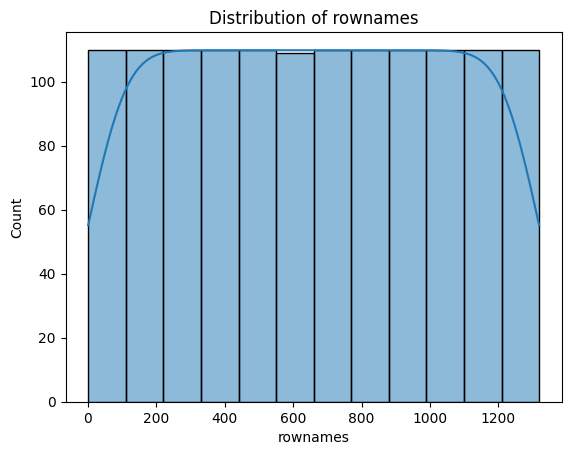

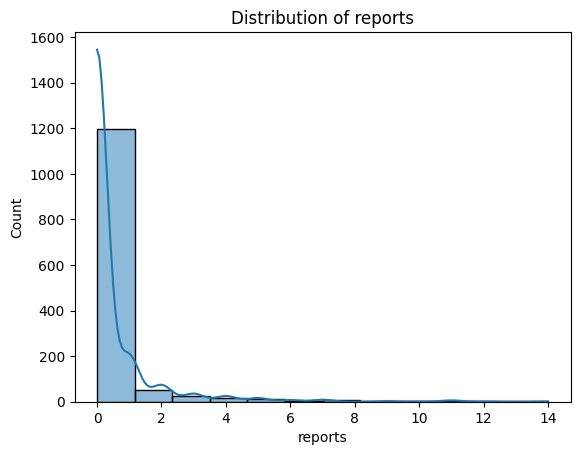

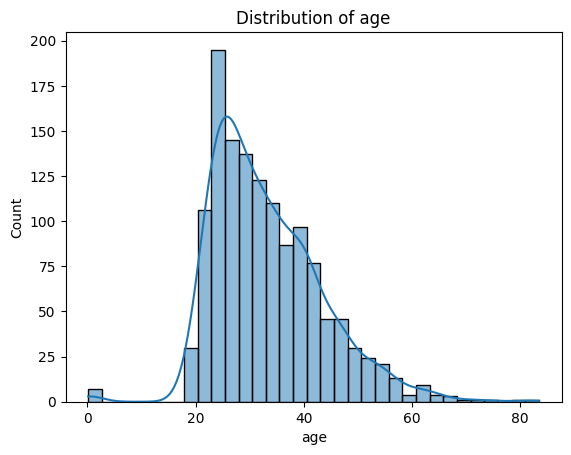

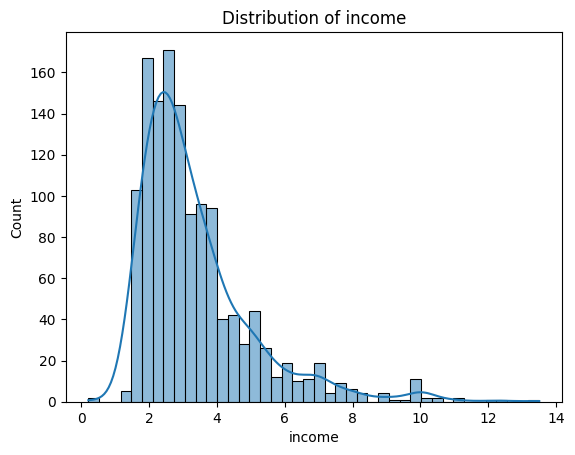

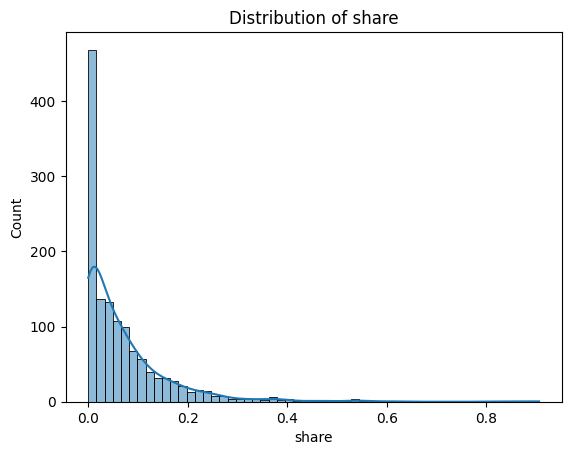

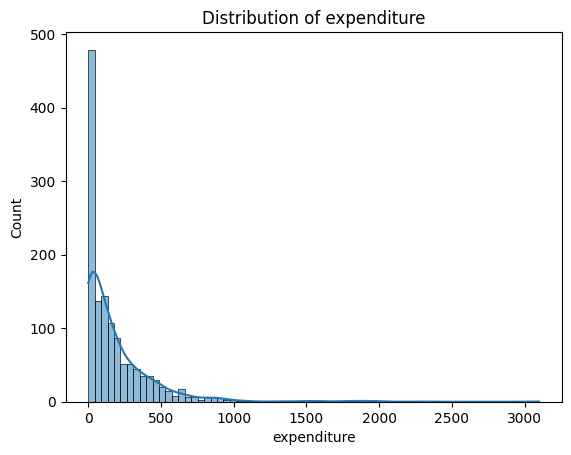

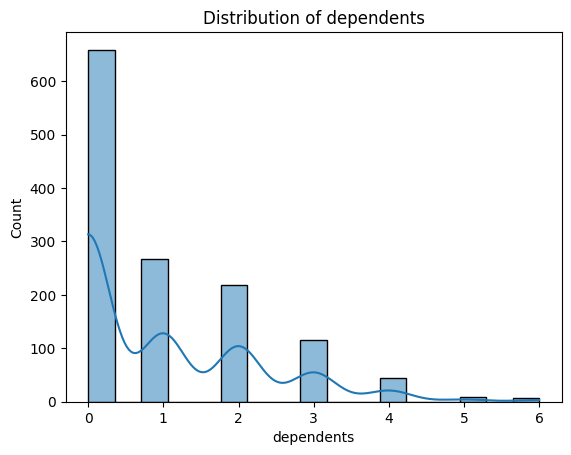

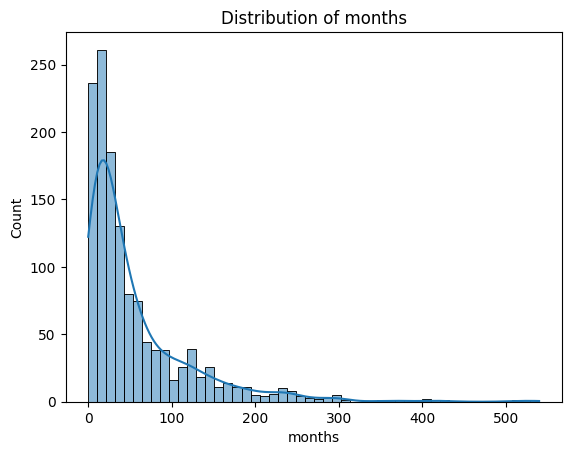

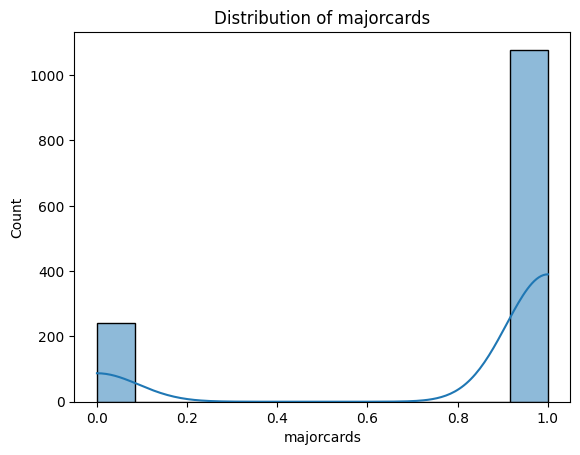

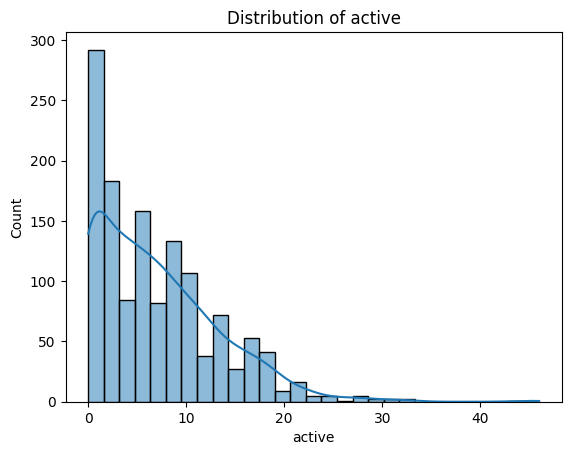

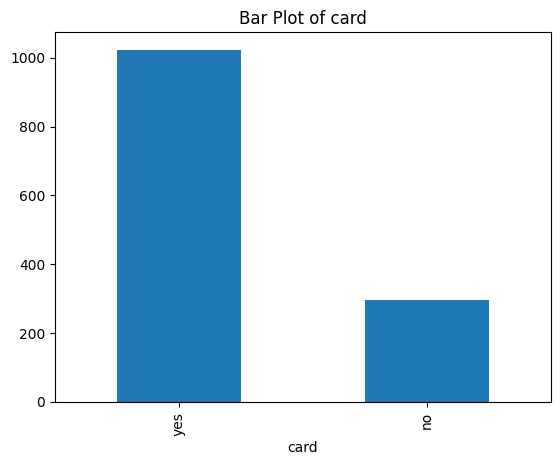

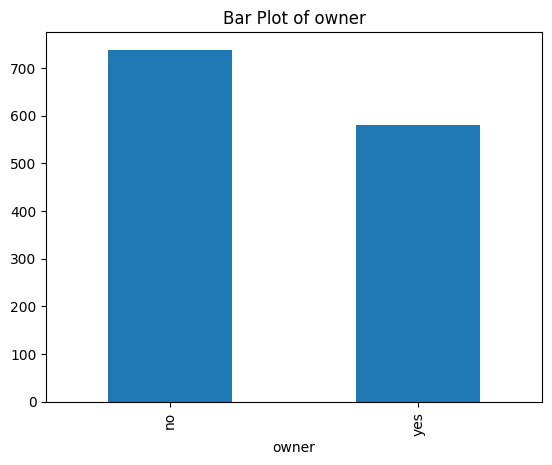

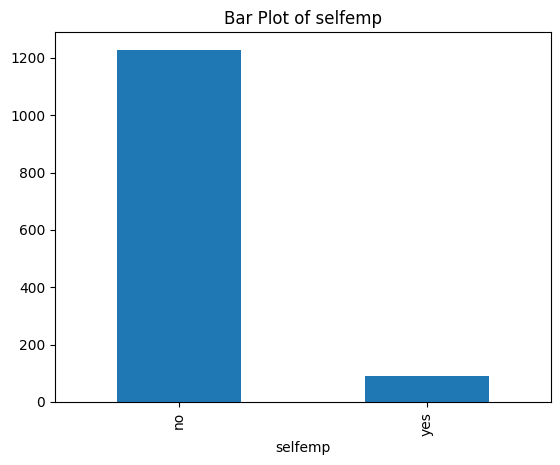

In [7]:
for col in data.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
for col in data.select_dtypes(include='category').columns:
    plt.figure()
    data[col].value_counts().plot(kind='bar')
    plt.title(f"Bar Plot of {col}")
    plt.show()

Bivariate Analysis

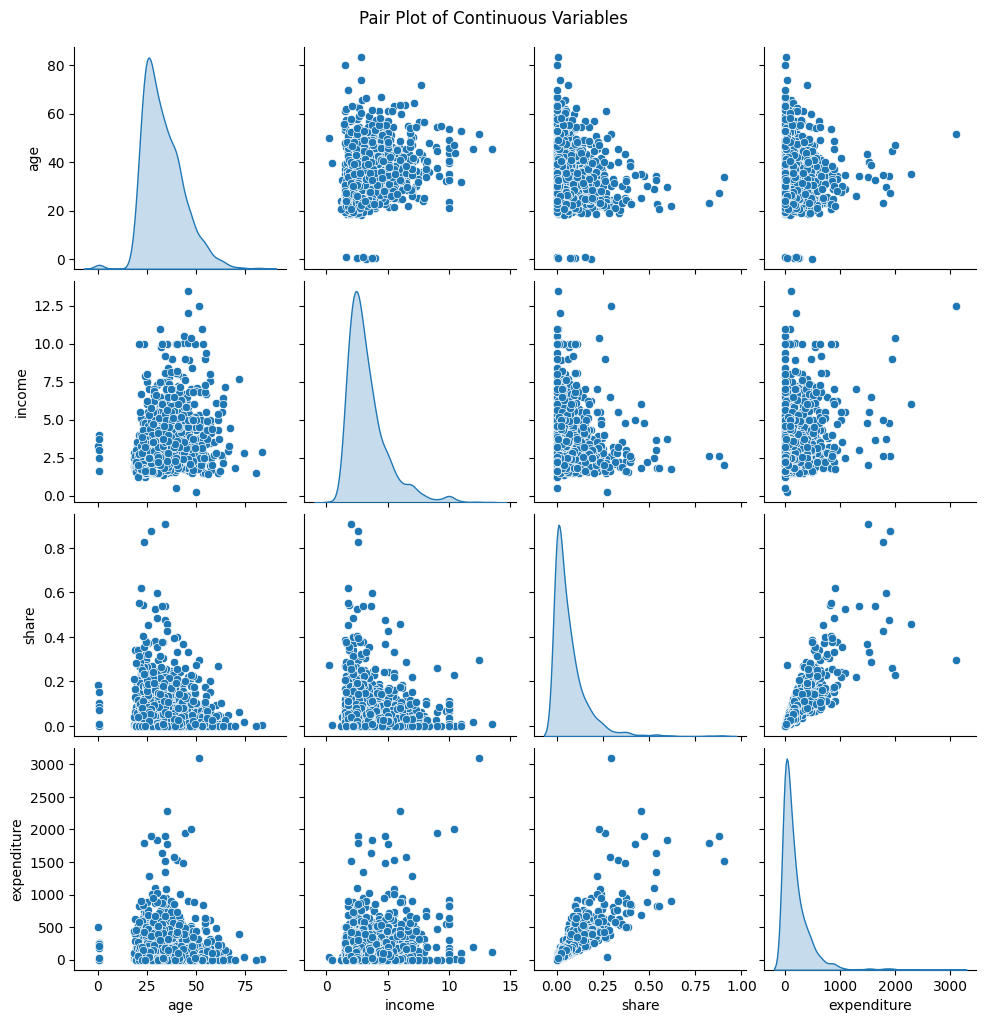

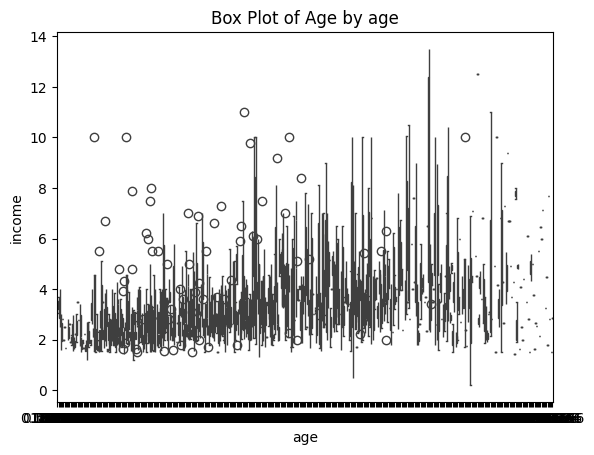

Contingency Table:
income     0.2100   0.4900   1.2000   1.3200   1.4340   1.4500   1.5000   \
age                                                                        
0.166667         0        0        0        0        0        0        0   
0.500000         0        0        0        0        0        0        0   
0.583333         0        0        0        0        0        0        0   
0.750000         0        0        0        0        0        0        0   
18.166670        0        0        0        0        0        0        0   
...            ...      ...      ...      ...      ...      ...      ...   
69.750000        0        0        0        0        0        0        0   
71.833340        0        0        0        0        0        0        0   
74.166660        0        0        0        0        0        0        0   
80.166660        0        0        0        0        0        0        1   
83.500000        0        0        0        0        0        0      

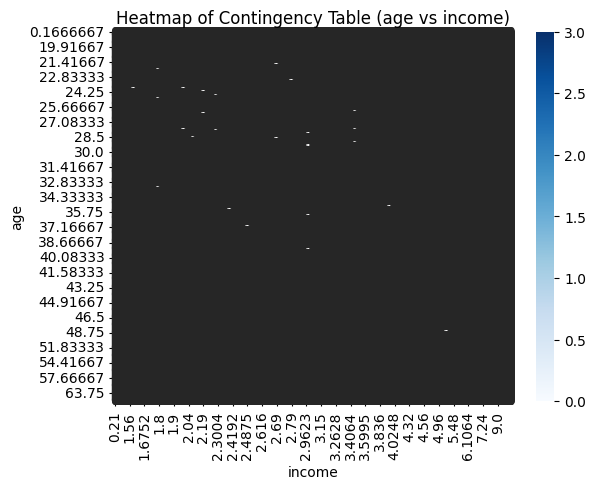

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Continuous vs Continuous (Scatter Plot + Correlation)
sns.pairplot(data[['age', 'income', 'share', 'expenditure', 'owner']], diag_kind='kde')
plt.suptitle("Pair Plot of Continuous Variables", y=1.02)
plt.show()
sns.boxplot(x='age', y='income', data=data)
plt.title("Box Plot of Age by age")
plt.show()
contingency_table = pd.crosstab(data['age'], data['income'])
print("Contingency Table:")
print(contingency_table)
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt='d')
plt.title("Heatmap of Contingency Table (age vs income)")
plt.show()

Multivariate Analysis

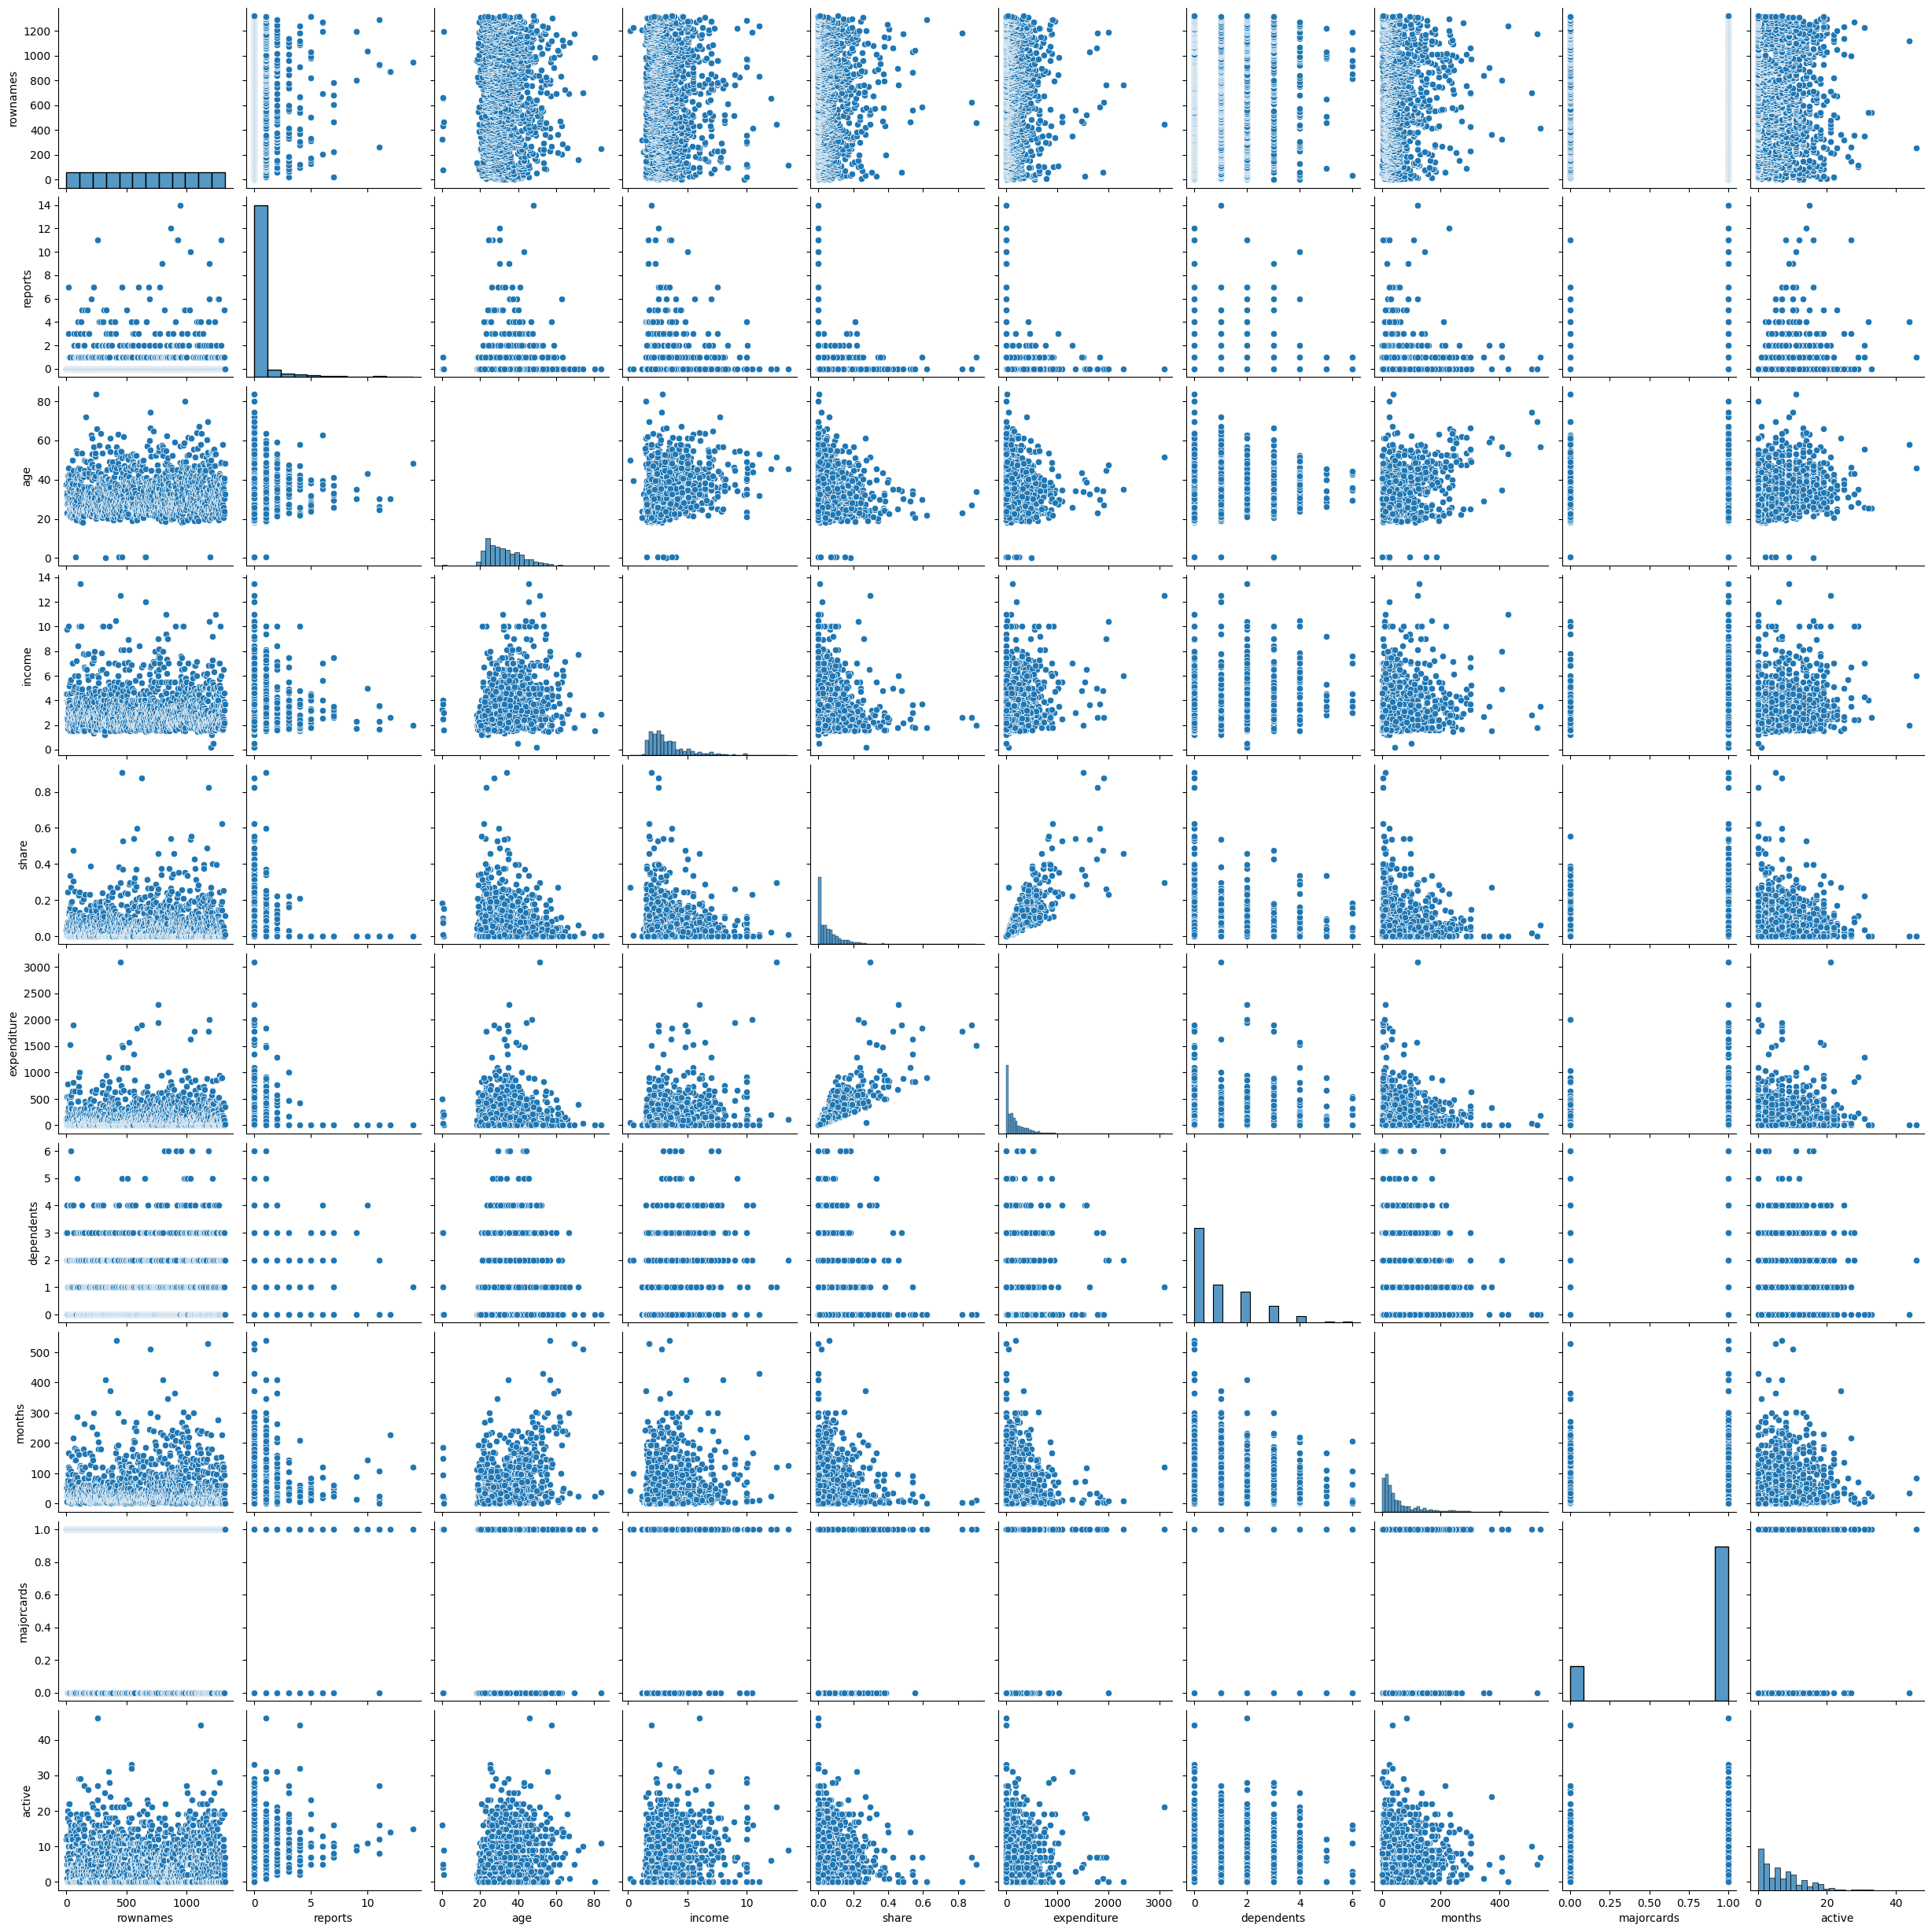

In [9]:
sns.pairplot(data.select_dtypes(include=np.number))
plt.show()

Correlation Matrix

rownames          int64
card           category
reports           int64
age             float64
income          float64
share           float64
expenditure     float64
owner          category
selfemp        category
dependents        int64
months            int64
majorcards        int64
active            int64
dtype: object
rownames: [   1    2    3 ... 1317 1318 1319]
reports: [ 0  7  3  1  2  4  5  6 11  9 12 14 10]
age: [37.66667   33.25      33.66667   30.5       32.16667   23.25
 27.91667   29.16667   37.        28.41667   42.        30.
 28.83333   35.33333   41.16667   40.08333   29.5       39.5
 45.75      35.25      25.16667   34.25      35.75      42.66667
 30.25      21.66667   22.25      40.        21.83333   29.41667
 24.91667   21.        23.83333   42.83333   42.58333   36.58333
 26.75      27.75      26.25      23.33333   29.91667   38.33333
 28.16667   35.58333   37.75      26.08333   49.75      24.25
 20.66667   23.75      25.75      32.91667   34.33333   44.66667
 21

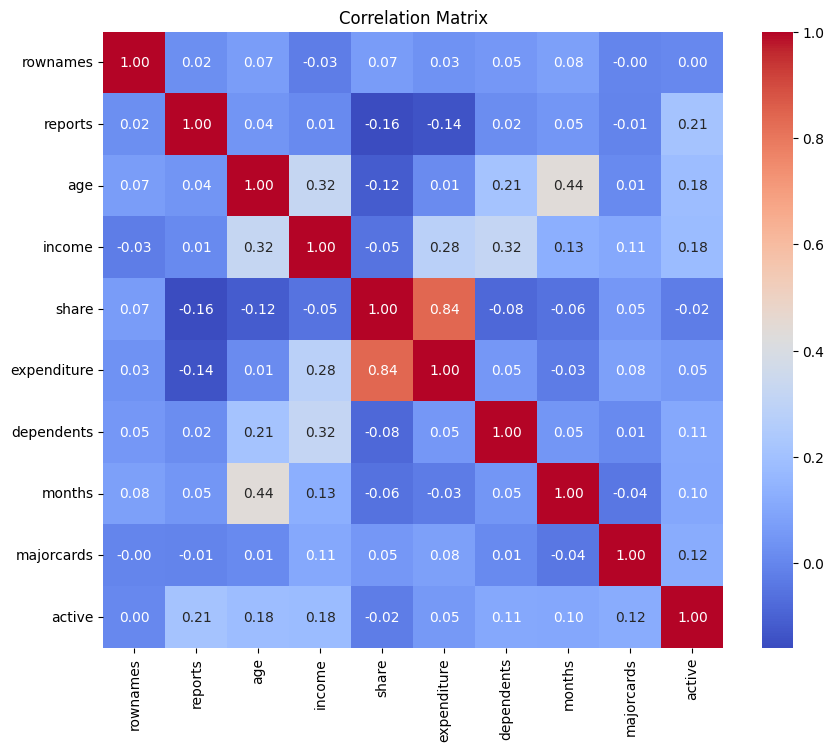

In [10]:
print(data.dtypes)
for col in data.select_dtypes(include='number').columns:
    print(f"{col}: {data[col].unique()}")
data.replace("?", np.nan, inplace=True)
for col in data.columns:
    if data[col].dtype == 'object':
        try:
            data[col] = pd.to_numeric(data[col])
        except ValueError:
            pass
data.fillna(data.select_dtypes(include='number').mean(), inplace=True)
# Correlation matrix
cor_matrix = data.select_dtypes(include='number').corr()
print(cor_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Clustering

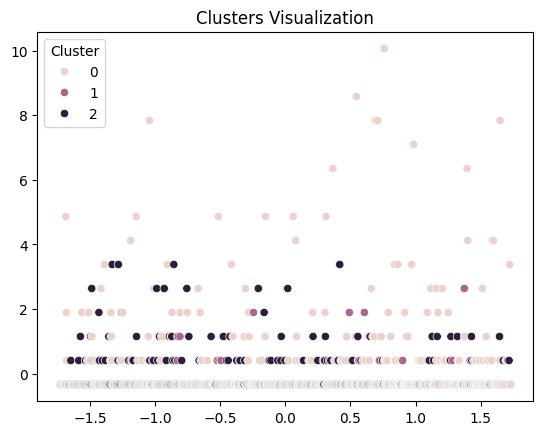

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=np.number))
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=data['Cluster'])
plt.title("Clusters Visualization")
plt.show()

Dimensionality Reduction

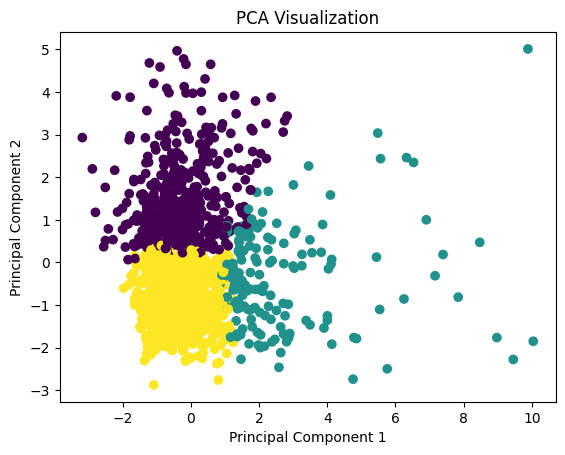

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['Cluster'])
plt.title("PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Model Development and Evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


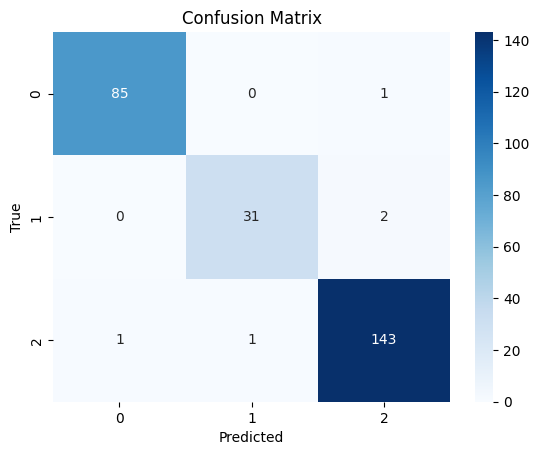

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        86
           1       0.97      0.94      0.95        33
           2       0.98      0.99      0.98       145

    accuracy                           0.98       264
   macro avg       0.98      0.97      0.98       264
weighted avg       0.98      0.98      0.98       264

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
if data['Cluster'].dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    data['Cluster'] = le.fit_transform(data['Cluster'])
X = data.select_dtypes(include=np.number).drop('Cluster', axis=1)
y = data['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
if len(data['Cluster'].unique()) == 2:
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()